In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # warning not necessary for these visual/insightful tasks

## Load the data

In [11]:
path = "data/"
artists = pd.read_csv(path+"artists.csv")
tracks = pd.read_csv(path+"tracks.csv")
# dict_artists = pd.read_json(path+"dict_artists.json") # probably won't use this data

## Exploratory Data Analysis

### Artists

In [15]:
artists.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [18]:
artists.describe(include="all")

,id,followers,genres,name,popularity
count,1104349,1.104336e+06,1104349,1104349,1.104349e+06
unique,1104349,NaN,48788,1078660,NaN
top,3IJ3IBVZfKrrqusgQqNer2,NaN,[],Forró Cintura de Mola,NaN
freq,1,NaN,805733,12,NaN
mean,NaN,1.074304e+04,NaN,NaN,9.083884e+00
std,NaN,2.609554e+05,NaN,NaN,1.376310e+01
min,NaN,0.000000e+00,NaN,NaN,0.000000e+00
25%,NaN,1.000000e+01,NaN,NaN,0.000000e+00
50%,NaN,5.900000e+01,NaN,NaN,2.000000e+00
75%,NaN,4.510000e+02,NaN,NaN,1.400000e+01


In [20]:
artists.isna().sum()

id             0
followers     13
genres         0
name           0
popularity     0
dtype: int64

From the describe() function and the number of null values above, we see that the data for artists seem to be pretty clean. Indeed, there seem to be very few missing values (except for genres, see later). Only 13 entries for "followers" are null, out of the 1104349 entries. Also, looking at the description of the data above, we see that the number of followers doesn't seem to have any out of range values ( < 0 or absurdly huge). However, as mentionned before, there seem to be quite a lot of data missing for the genre attribute. The most represented value for the genre is "[]", which indicates that no genre are available for this artist. There are 48788 such missing value, which represents 4.5% of the data. It may be wise to discard these entries (at least for some tasks), as we won't be able to compare them based on the genre.

In [22]:
48788/1104349*100

4.417806327528707

Now let's see some interesting statistics on these artists :

Text(0.5, 0, 'Number of followers')

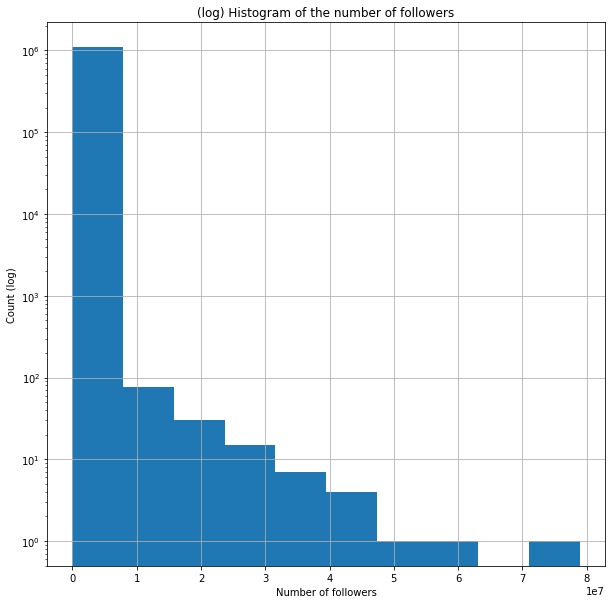

In [51]:
# Followers
plt.figure(figsize=(10,10))

plt.yscale("log")
artists["followers"].hist()
plt.title("(log) Histogram of the number of followers")
plt.ylabel("Count (log)")
plt.xlabel("Number of followers")

In [98]:
# Genres :
# first, map genres to list
genres = artists[artists["genres"] != "[]"]
genres["genres"] = genres["genres"].apply(lambda x: x[1:-1].split(","))
genres = genres.explode("genres").groupby("genres").count()["id"].rename("Number of artists per genre")

Text(0.5, 1.0, 'Distribution of the number of artists for the genres ')

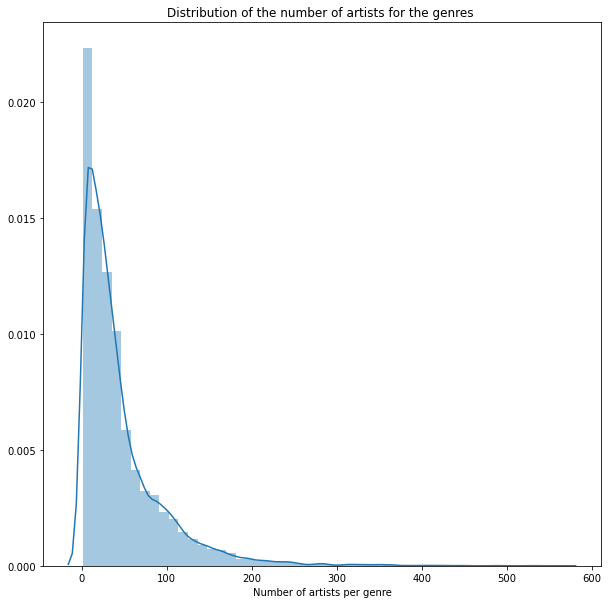

In [92]:
plt.figure(figsize=(10,10))

g = sns.distplot(genres)
plt.title("Distribution of the number of artists for the genres ")

In [90]:
genres[genres == genres.max()]

genres
 'rock'    564
Name: count, dtype: int64

In [93]:
genres[genres == genres.min()]

genres
 'acid techno'                   1
 'acousmatic'                    1
 'african metal'                 1
 'african-american classical'    1
 'afro dancehall'                1
                                ..
'sierreno'                       1
'singer-songwriter'              1
'thrash metal'                   1
'trio batak'                     1
'viking metal'                   1
Name: Number of artists per genre, Length: 369, dtype: int64

We see that most genres are represented by less than 70 artists. The most represented genre is "rock", with 564 artists. There are 369 genres that are represented by only one artist (!). Looking at the names, we see that these are mostly extremely niche/specific ones like "acid techno" or "trio batak".

In [103]:
artists[artists["popularity"] == artists["popularity"].max()]

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100


In [105]:
artists[artists["followers"] == artists["followers"].max()]

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"['pop', 'uk pop']",Ed Sheeran,92


Using the popularity (which seems to be a score between 0 and 100), we see that Justing Bieber is the most popular artist on the platform. Interestingly he is not the artist with the most followers, this is Ed Sheeran. With a quick search on google, we see that this scores seem to be computed from a "secret" algorithm, but is most likely based on the the popularity of the artists' tracks, themselveves with a popularity based on the number of plays (and how long it took to reach this number of plays).

### Tracks

In [106]:
tracks.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [114]:
tracks.describe(include="all")

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672,586601,586672.000000,5.866720e+05,586672.000000,586672,586672,586672,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
unique,586672,446474,NaN,NaN,NaN,114030,115062,19700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2PQIWPYkoT9KkmiJ6EwUq7,Summertime,NaN,NaN,NaN,['Die drei ???'],['3meJIgRw7YleJrmbpbJK6S'],1998-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,101,NaN,NaN,NaN,3856,3856,2893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,27.570053,2.300512e+05,0.044086,NaN,NaN,NaN,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,NaN,NaN,18.370642,1.265261e+05,0.205286,NaN,NaN,NaN,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,NaN,NaN,0.000000,3.344000e+03,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,13.000000,1.750930e+05,0.000000,NaN,NaN,NaN,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,NaN,NaN,27.000000,2.148930e+05,0.000000,NaN,NaN,NaN,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,NaN,NaN,41.000000,2.638670e+05,0.000000,NaN,NaN,NaN,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000


In [113]:
tracks.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

Again, very few missing data (only some song names). 

In [125]:
# Number of songs per artists :
songs_count = tracks[["id", "artists"]]
songs_count["artists"] = songs_count["artists"].apply(lambda x: x[1:-1].split(",")).explode("artists")
songs_count = songs_count.groupby("artists").count()["id"].rename("count")
songs_count

artists
                                                 1
 "''Metropolio'' Orkestras"                      1
 "'In The Heights' Original Broadway Company"    1
 "'Legally Blonde' Ensemble"                     2
 "Alexander O'Neal"                              3
                                                ..
Vangelis'                                        3
Vyturys"'                                        1
Wang Ming Quan'                                  1
Zina Arvanitidi'                                 1
nowhere.'                                        1
Name: count, Length: 89587, dtype: int64

Text(0.5, 1.0, 'Distribution of the number of tracks per artists ')

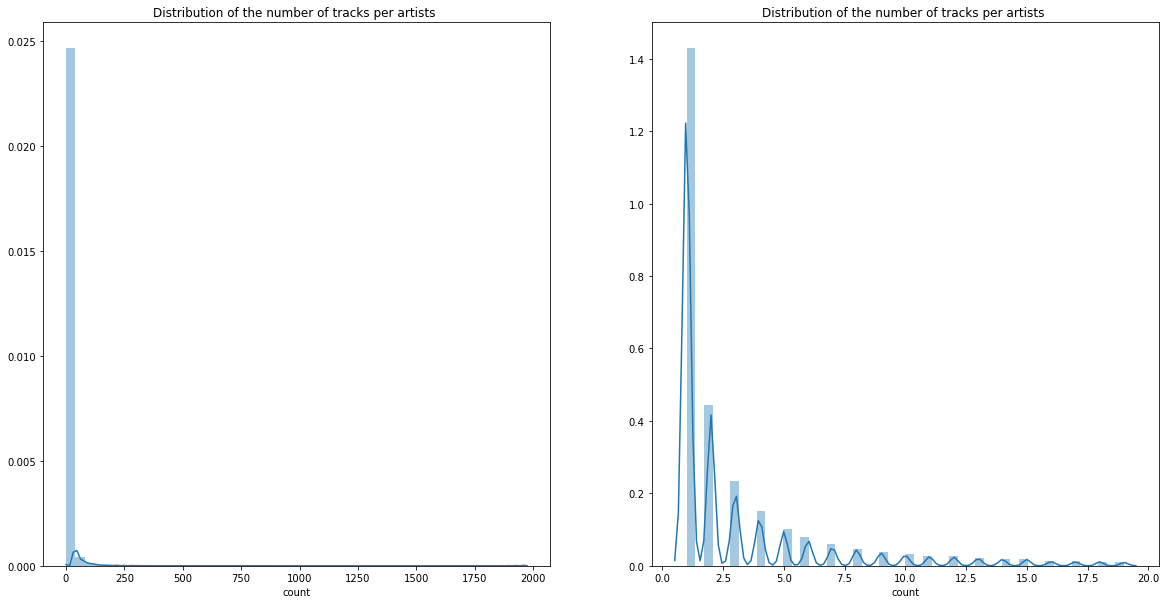

In [132]:
plt.figure(figsize=(20,10))

plt.subplot(121)
g1 = sns.distplot(songs_count)
plt.title("Distribution of the number of tracks per artists ")

plt.subplot(122)
g1 = sns.distplot(songs_count[songs_count < 20])
plt.title("Distribution of the number of tracks per artists ")

In [133]:
songs_count.max()

1974

In [135]:
songs_count[songs_count == songs_count.max()]

artists
'Francisco Canaro'    1974
Name: count, dtype: int64

In [134]:
songs_count.min()

1

We see that most artists have less than 10 songs out on spotify. many of them have only 1 tracks and very few have lots of songs. The artist with the maximum number of tracks os "Francisco Canaro" who is an artist who was popular in the first half of the 20th century. He took part in a whopping 1974 tracks !